### Task # 4 - To Explore Decision Tree Algorithm
For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.
Dataset :
https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10Yi
wK-/view?usp=sharing
Sample Solution : https://drive.google.com/file/d/1mQguC2gku2-
QFruj09a30N0TYDwCmPkq/view?usp=sharing


## Decision Tree
Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, decision tree algorithm can be used for solving regression and classification problems too. ... The decision tree algorithm tries to solve the problem, by using tree representation.

Decision Tree Classification
In this Decision Tree Classification, attribute selection measures, and how to build and optimize Decision Tree Classifier using Python Scikit-learn package.

Classification is a two-step process, learning step and prediction step. In the learning step, the model is developed based on given training data. In the prediction step, the model is used to predict the response for given data. Decision Tree is one of the easiest and popular classification algorithms to understand and interpret. It can be utilized for both classification and regression kind of problem.

In this tutorial, you are going to cover the following topics:
Decision Tree Algorithm
How does the Decision Tree algorithm work?
Attribute Selection Measures
Information Gain
Gain Ratio
Gini index
Optimizing Decision Tree Performance
Classifier Building in Scikit-learn
Pros and Cons
Conclusion
### Decision Tree Algorithm
A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.


Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.

How does the Decision Tree algorithm work?

1) The basic idea behind any decision tree algorithm is as follows:

Select the best attribute using Attribute Selection Measures(ASM) to split the records.
Make that attribute a decision node and breaks the dataset into smaller subsets.
Starts tree building by repeating this process recursively for each child until one of the condition will match:
All the tuples belong to the same attribute value.
There are no more remaining attributes.
There are no more instances.

Attribute Selection Measures 

Attribute selection measure is a heuristic for selecting the splitting criterion that partition data into the best possible manner. It is also known as splitting rules because it helps us to determine breakpoints for tuples on a given node. ASM provides a rank to each feature(or attribute) by explaining the given dataset. Best score attribute will be selected as a splitting attribute (Source). In the case of a continuous-valued attribute, split points for branches also need to define. Most popular selection measures are Information Gain, Gain Ratio, and Gini Index.

Information Gain
Shannon invented the concept of entropy, which measures the impurity of the input set. In physics and mathematics, entropy referred as the randomness or the impurity in the system. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values. ID3 (Iterative Dichotomiser) decision tree algorithm uses information gain.

### Importing libraries in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
%matplotlib inline

### Loading the iris dataset

In [2]:
datas=pd.read_csv('Iris.csv')
datas.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Here, we need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [3]:
datas.drop(['Id'],axis=1,inplace=True)
X=datas.iloc[:,:-1].values
Y=datas.iloc[:,-1].values
datas.head(20)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Splitting the dataset into training set and test set
Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.
Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

### Feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Fitting decision tree classifier to the training set

In [6]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='gini',random_state=0)
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Predicting the test results

In [7]:
y_pred=classifier.predict(X_test)

### Making confusion matrix

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


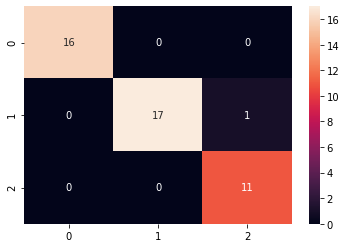

In [8]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)

### Visualizing Decision Trees
We can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree also need to install graphviz and pydotplus.

pip install graphviz
pip install pydotplus

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.

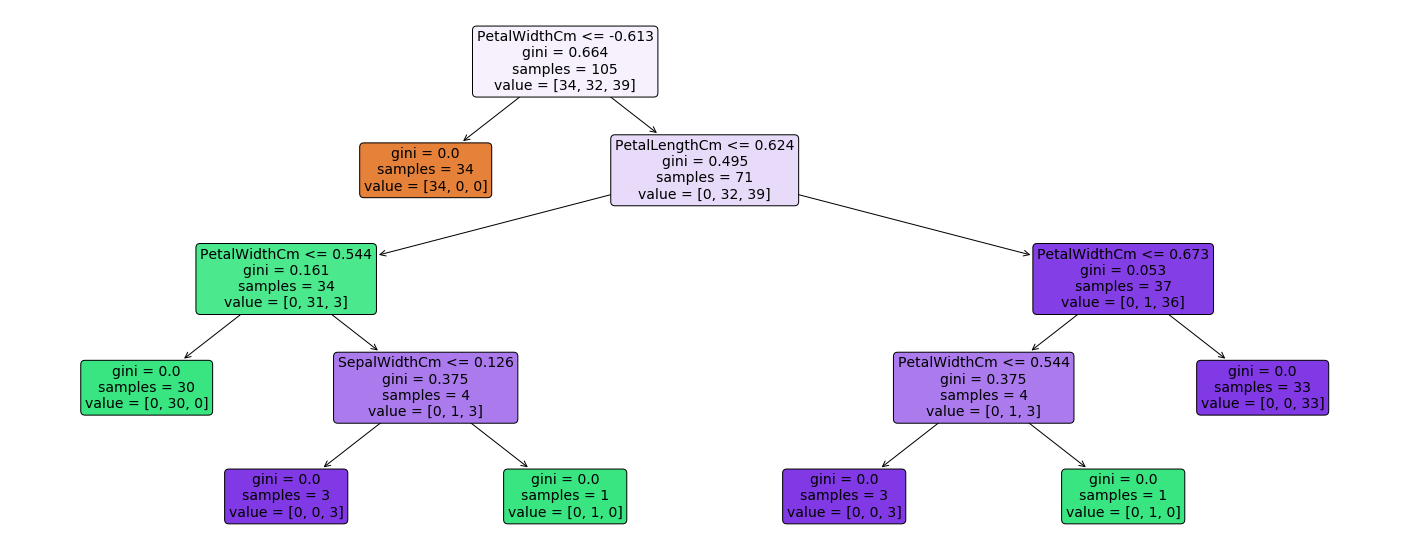

In [9]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
a=plot_tree(classifier,feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
         ,filled=True,rounded=True,fontsize=14)


### Accuracy
Accuracy can be computed by comparing actual test set values and predicted values.

In [10]:
from sklearn import metrics
metrics.accuracy_score(y_pred,Y_test)

0.9777777777777777